# Carbon Fiber Leg Beam Stress Calculations
***
## Aim: 

The goal of this notebook is to identify the stress associated with placing the CF leg at different positions along the rotor arm. It is trivial that as the leg is placed further away from the cantilever point, the easier it is to create a larger moment about the cantilever point.


The relationship between the normal force, $N$, distance ,$\Delta x$, and moment ,$M_{A}$, to the stress, $\sigma_{\Delta x}$ is being investigated. <br> $\sigma_{\Delta x}$ is then compared to the ultimate tensile stress of the carbon fiber beam, $\sigma_{uts}$
***

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Constant Definitions

In [2]:
g = 9.81 # m/s.s

### Carbon Fiber Material Properties

In [3]:
CF_ultimate_tensile_strength = 4.41e+9 # 4.41 GPa
CF_compressive_strength = 1.5*869e+6 #Multiplied by 1.5 to try find more realistic value
CF_young_modulus = 2.34e+11 # 234 GPa

### Carbon Fiber Square Tube Properties
***
#### 1. Finding the 2nd Moment of Inertia: <br>$$I_{xx} = \frac{b_{0}d_{0}^{3}}{12} - \frac{b_{1}d_{1}^{3}}{12}$$
#### 2. Distance from neutral axis, $\bar{y}$, to the Centroid :<br> $$\bar{y} = \frac{\sum A\bar{y}}{\sum A}$$

In [4]:
# 2nd moment of inertia calc:
# units in metres
b0 = 0.0254
d0 = b0
b1 = 0.02413
d1 = b1
thickness = 0.00127
Ixx = (b0*d0**3/12)-(b1*d1**3/12) # 2nd Moment of inertia for square tubing

# tubing lenght and weight
cf_length = 0.45
cf_density = 0.0536 # mass per meter
arm_mass = cf_length*cf_density
arm_weight = arm_mass*g

# Y centroid y_bar
#y_nume = b0*thickness*((b0-thickness/2)+(thickness/2)) + b1*thickness*(()+())
# Its in the midde of the Square...
y_bar = b0/2

### Motor and Leg Constants

In [5]:
# Motor mass and weight
motor_mass = 0.150
motor_weight = motor_mass*g
# CF leg mass and weight
leg_mass = 0.035
leg_weight = leg_mass*g

## Bending Stress Analysis (Static Test)

### Free Body Diagram
<img src="beam-analysis-FBD.png" width=500 height=500 />

### Parameters

In [6]:
# Normal Force List of values
N_min = 0.5 # min mass of drone
N_max = 10 # max mass of drone
N_samples = 50
N = np.linspace(N_min,N_max,N_samples)
N_Force = N*g

# Varying Distance over the Arm
X_samples = 11
X = np.linspace(0,0.45,X_samples) # With 11 positions, get the mid point too

### Sum of Forces:
### $$\sum F = 0$$

In [7]:
reaction_A = motor_weight + leg_weight + arm_weight - N_Force

### Sum of Moments about A:
### $$\sum M_{A} = 0$$

In [8]:
reaction_M = np.zeros((X_samples, N_samples))
for xi, x in enumerate(X):
    for ni, n in enumerate(N_Force):
        tot = motor_weight*cf_length + leg_weight*x + arm_weight*(cf_length/2) - n*x
        reaction_M[xi][ni] = tot

### Visualise Moment due to Normal Force

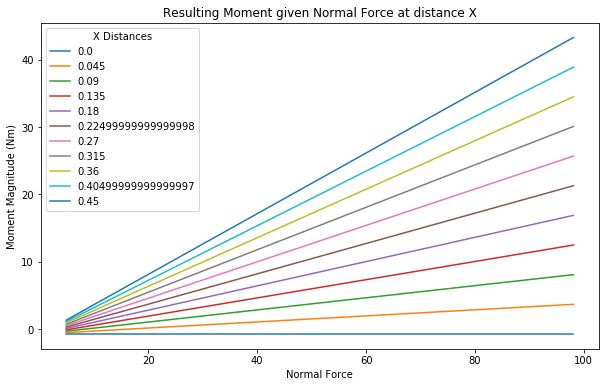

In [9]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_xlabel('Normal Force (N)')
axes.set_ylabel('Moment Magnitude (Nm)')
axes.set_title('Resulting Moment given Normal Force at distance X');
for i in range(0,11):
    axes.plot(N_Force,-reaction_M[i], label=X[i]) #Negative sign to see magnitude only
axes.legend(title="X Distances")

### Anlysis of above graph
#### Direction:
The moment ,$M_{A}$, is depicted as negative here when its predicted value in the free body diagram was positive. The reason it is inverted, is because the moment is reacting to the normal force applied in the positive direction (i.e. UP). Thus the moment should be negative to try keep the system in equilibrium as the force is so large.

#### Linear Relationship:
The linear looking fashion of the graph also makes sense as the relationship between a moment, force and distance is linear, i.e. $M_{A} = N\Delta x $. So if either $\Delta x$ or $N$ is constant while the other varies the result will be a straigh line.

## Investigate the Bending Stress due to Moment Caused
***
Stress is defined as follows and allows the conversion from a bending moment to the stress caused.

### $$\sigma = \frac{M \bar{y}}{I_{xx}}$$

$\sigma$ is the stress <br> $\bar{y}$ is the distance from neutral axis to the centroid <br> $I_{xx}$ is the second moment of inertia <br> $M$ is the moment magnitude

## Stress analysis:
***
### The following is intended to be a comparison of the resultant stresses from corresponding moments caused.
The comparison is done via a heat map. To further explain, the resulting stresses are divided by the ultimate tensile stress to create a ratio. The closer the ratio is to 1, the closer the two stress are. This is indicated on the heat map via the varying colour, as the value increases so the colour changes.


In [10]:
sigma = (-reaction_M*y_bar)/Ixx #negative sign just to nullify the direction of the moment.

In [12]:
sigma.shape

(11, 50)

In [13]:
uts = CF_ultimate_tensile_strength*np.ones((11,50))

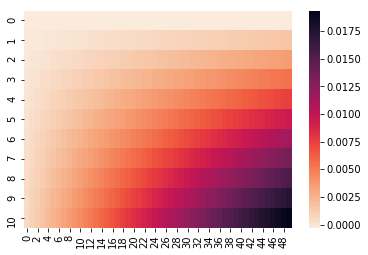

In [14]:
sns.heatmap(sigma/uts, cmap='rocket_r')

### Analysis of Heat Map 1 and Resulting Stress
Axes definitions:<br>
- X-axis: The forces applied at the leg, increase from 0 to 49
- Y-axis: The distance from the center hub, increases from 0 to 10 <br>


It is clear form the scale on the right hand side that the resulting stress from the moments and thus normal force applied at the leg that the stress induced in the beam is extremely small compared to the ultimate tensile strength of the CF beam

[0.02992887 0.04908295 0.06823703 0.08739111 0.10654519 0.12569927
 0.14485335 0.16400743 0.18316151 0.20231559 0.22146967 0.24062375
 0.25977783 0.2789319  0.29808598 0.31724006 0.33639414 0.35554822
 0.3747023  0.39385638 0.41301046 0.43216454 0.45131862 0.4704727
 0.48962678 0.50878086 0.52793494 0.54708901 0.56624309 0.58539717
 0.60455125 0.62370533 0.64285941 0.66201349 0.68116757 0.70032165
 0.71947573 0.73862981 0.75778389 0.77693797 0.79609205 0.81524612
 0.8344002  0.85355428 0.87270836 0.89186244 0.91101652 0.9301706
 0.94932468 0.96847876]


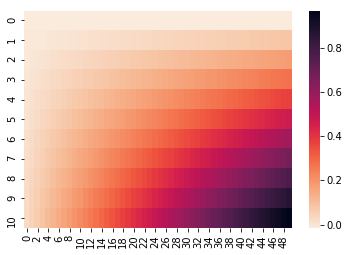

In [15]:
copy = 50*sigma
#plt.figure(figsize=(15,10))
print(copy[10]/uts[10])
sns.heatmap(copy/uts,cmap='rocket_r')

### Analysis of Heat Map 2 and Resulting Stress
This heat map shows a scaled version of the stresses induced by the normal force. The stresses were multiplied by $50$ in order to reach the ultimate tensile stress.

## Conclusion

The leg can realistically be positioned anywhere along the rotor arm and in no ordinary case should the CF arm shear and break. It should still be said that if the UAV falls out of the sky it is very likely that an arm (and likely more) will break. I find no further reason to explore how fast the aircraft can be landed as in no ordinary scenario can the UAV be expected to land at full speed or terminal velocity without some damaged resulting. The UAV will 99% of the time land in a controlled and careful manner.

## Notes
Impact test for weaker material to lower the safety factor.<br>
Maybe reconsider material.

### References:
Helpful to write math in here:https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214

<br> maybe check this: http://homepages.engineering.auckland.ac.nz/~pkel015/SolidMechanicsBooks/Part_I/BookSM_Part_I/08_Energy/08_Energy_02_Elastic_Strain_Energy.pdf
***
***

# Dynamic Test

### Description of Section
***
There are two tests run in this section due to the nature of the bending applied to the carbon fiber arm.<br>
#### Tests:

#### 1. Tensile Test:
- In this case, the bottom section of the arm will be in tension requiring us to consider the energy required to exceed the UTS.

#### 2. Compressability Test:
- Subsequently, the top of the arm will be in compression and thus require the investigation of the energy required to exceed the compressability of the carbon fiber arm.

#### Hypothesis:

Due to the material properties of carbon fiber, it is expected that the material will fail in compression well before the failure in tension.

### Theory:
***
#### Elastic Strain Energy:
$$U_{strain} = \int{\frac{\sigma^{2}}{2E}dV}$$

$dV$: Volume
#### 1. Elastic strain equaition
The total strain energy stored in the beam of $Volume = Area Length$
$$\frac{\sigma^{2}A L}{2E} = K_{in}+V_{in}$$

$\sigma$: To find.<br>
$A$: Cross-section area of CF arm<br>
$L$: Length of Arm<br>
$E$: Youngs Modulus<br>
$K_{in}$: Input kinetic energy<br>
$V_{in}$: Input potential energy<br>

#### 1.1 Elastic strain equation reconfigured to consider the moment.
Substitude the strain into the Strain energy integral and integrate:
$$\sigma = \frac{M \bar{y}}{I_{xx}}$$

$$U_{strain} = \int{\frac{(M\bar{y})^{2}}{2EI_{xx}^2}dV}$$

M can be reduced to a force $P$ acting at some distance $x$ resulting in the following:
$$U_{Strain} = \frac{P^{2}}{6EI}[L^{3}-x^{3}]$$
#### 2. Strain
$$\sigma = \frac{M \bar{y}}{I_{xx}}$$



#### Assumptions:
- Force act through leg and assume all strain is conserved in the transfer to the arm.
- Assume the strain will be disipated in the arm and break there. (i.e. it will not break at the arm join)
- $\frac{1}{3}$ of the weight of the drone is supported by each leg (total 3 legs).
- The stress calculated from the elastic strain equation is the maximum moment.
- Use the elastic strain since for brittle materials can assume: $\sigma_{uts} = \sigma_{yield}$

#### Process:<br>
~~1. Find the elastic strain for a specific height drop, no kinetic energy.~~

~~2. Can compare the strain to the ultimate tensile stress to evaluate breaking.~~

~~3. Convert the strain to a Moment to find the maximum moment experienced.~~

~~4. Use sum of moments ,$\sum M = 0$, to determine the associated force at varying distances.~~

## Elastic Strain

#### Constants for both tests

Code block purpose:
- Drop heights: y
- Potential energy: v
- Cross-section Area: A

In [40]:
# y heights
y_height_min = 0.5 # metres
y_height_max = 3 #
y_samples = 10
y_heights = np.linspace(y_height_min,y_height_max,y_samples)

# potential energy
drone_mass = 15/3 # div by 3 to account for each leg
v_in = g*drone_mass*y_heights

# cross-sectional area
cs_area = b0*d0 - b1*d1

# length of arm
cf_length = 0.45

### Tensile Test:
#### Solving for Strain:
$$\sigma = \sqrt{\frac{2EV_{in}}{AL}}$$
$\sigma_{uts} = 4.41GPa$

In [17]:
drop_stress_uts = np.sqrt(2*CF_young_modulus*v_in/(cs_area*cf_length))

Clarification of value plotted:
$$Ratio = \frac{\sigma_{drop Stress}}{\sigma_{uts}}$$

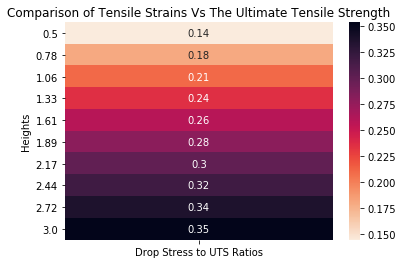

In [18]:
result_uts = pd.DataFrame({"Drop Stress to UTS Ratios":drop_stress_uts/CF_ultimate_tensile_strength,"Heights":np.round(y_heights,2)})
result_uts.set_index("Heights",drop=True,inplace=True)
sns.heatmap(data = result_uts, cmap="rocket_r",annot=True)
plt.title("Comparison of Tensile Strains Vs The Ultimate Tensile Strength")
plt.show()

#### Maximum Tensile Values:
1. Max Tensile Strain Energy
2. Max drop height to reach strain energy, from $V = mgh$

In [19]:
max_strain_en = (CF_ultimate_tensile_strength**2*cs_area*cf_length)/(2*CF_young_modulus)
print("Energy Required to Break:",np.round(max_strain_en,3),"J")
toDrop = max_strain_en/(drone_mass*g)
print("Max Drop Height:",np.round(toDrop,3),"m")

Energy Required to Break: 1176.294 J
Max Drop Height: 23.982 m


### Compressability Test:
$\sigma_{comp} = 1.5 \times 869MPa = 1.303GPa$

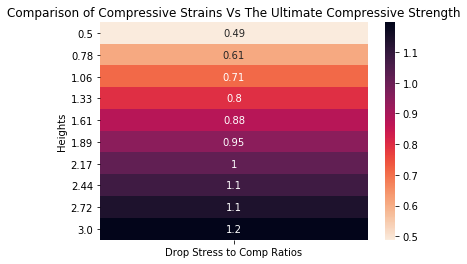

In [20]:
drop_stress_comp = np.sqrt(2*CF_young_modulus*v_in/(cs_area*cf_length))
result_comp = pd.DataFrame({"Drop Stress to Comp Ratios":drop_stress_comp/CF_compressive_strength,"Heights":np.round(y_heights,2)})
result_comp.set_index("Heights",drop=True,inplace=True)
sns.heatmap(data = result_comp, cmap="rocket_r",annot=True)
plt.title("Comparison of Compressive Strains Vs The Ultimate Compressive Strength")
plt.show()

#### Maxiumum Compressability Values:
1. Max Compressive Strain Energy
2. Max drop height to reach strain energy, from $V = mgh$

In [21]:
max_Cstrain_en = (CF_compressive_strength**2*cs_area*cf_length)/(2*CF_young_modulus)
print("Energy Required to Break:",np.round(max_Cstrain_en,3),"J")
toDrop_Comp = max_Cstrain_en/(drone_mass*g)
print("Max Drop Height:",np.round(toDrop_Comp,3),"m")

Energy Required to Break: 102.769 J
Max Drop Height: 2.095 m


### Comparison of Strains

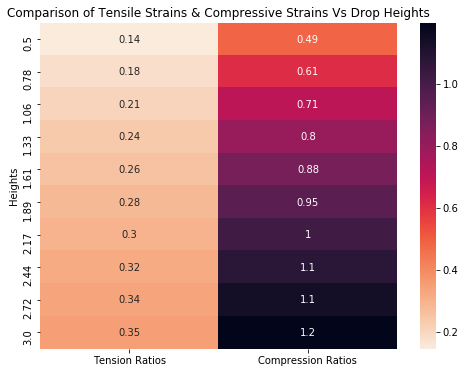

In [22]:
result_comparison = pd.DataFrame({"Tension Ratios":drop_stress_uts/CF_ultimate_tensile_strength,"Compression Ratios":drop_stress_comp/CF_compressive_strength,"Heights":np.round(y_heights,2)})
result_comparison.set_index("Heights",drop=True,inplace=True)
plt.figure(figsize=(8,6))
sns.heatmap(data = result_comparison, cmap="rocket_r",annot=True)
plt.title("Comparison of Tensile Strains & Compressive Strains Vs Drop Heights")
plt.show()

# Force Approach: (Unfinished)

#### Unsure of this section and thus the values above as I cannot get them to agree. I am also unsure if the above values are at the end of the arm or if it is simply the maximum energy that can be stored in the arm before breaking.

$$\frac{P^{2}}{6EI}(L^{3}-x^{3})$$

$x$: is the distance from the motor end of the arm that the force $P$ is applied at.

# Impulse and Force approach
$$F\Delta t = m\Delta v $$

Assumed that the drone is dropped from a stationary point above the ground:
$$0+(mgh)_{in} = (\frac{1}{2}mv^2)_{out} + 0$$
Change in velocity can be rewritten due to stationary start and relating to input and output energy:
$$\Delta v = v_{f}-v_{i} = v_{f}-0$$

$$v_{f} = \sqrt{2gh}$$

Thus impulse in terms of Force rewritten:
$$F = \frac{m\sqrt{2gh}}{\Delta t}$$

The following block shows the resulting energy stored in the arm for a fixed force at varying distances along the arm:
#### Calculation 1:

In [41]:
m = 5
h = 2.095
d = np.linspace(0,0.449,10) # distance along the arm. STARTING AT MOTOR END!
dt = 0.01# Unreasonable = 156 G impact, xD.
F = (m*(2*g*h)**0.5)/(dt)
print("Force:",F)
en = ((F**2)/(6*CF_young_modulus*Ixx))*(L**3-d**3)
print("Energy:", en)

Force: 3205.616165419684
Energy: [103.65984879 103.51860007 102.52985902  99.84613332  94.61993064
  86.00375865  73.15012503  55.21153744  31.34050358   0.68953109]


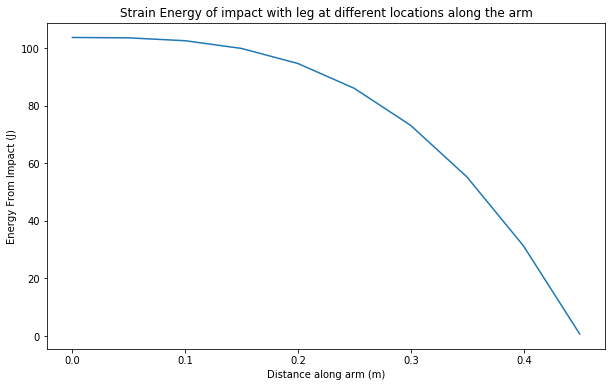

In [27]:
fig, axes = plt.subplots(figsize=(10,6))
axes.set_xlabel('Distance along arm (m)')
axes.set_ylabel('Energy From Impact (J)')
axes.set_title('Strain Energy of impact with leg at different locations along the arm');
axes.plot(d,en)

#### Sanity Check using the strain equation:
$$\sigma = \frac{M\bar{y}}{I_{xx}} = \frac{(Fx)\bar{y}}{I_{xx}}$$

In [51]:
x = 0.45
F = (m*(2*g*h)**0.5)/(dt)
sig = ((F)*x*y_bar)/(Ixx)
sig/CF_compressive_strength

2.1844082956068065

#### Sanity check does not correspond with previous calculation.
Reasons:
1. Force in first calculation is the F required to create desired energy of ~103 Joules to break arm.
2. The same force F using the Strain equation results in a strain twice the size of the ultimate compressability of CF. Meaning the force F is twice as large as it needs to be.
3. Thus one of the calculations do not make sense, I believe its the first.

In [62]:
#df = pd.DataFrame({"Ten":drop_stress_uts,"Comp":drop_stress_comp,"Heights(m)":np.round(y_heights,2)})
#df.set_index("Heights(m)",drop=True,inplace=True)
#df

## Plot of Strain equation
The plot is displaying the following relationship:

$$F = \frac{\sigma I_{xx}}{\bar{y}d}$$
$\sigma$: is the ultimate tensile and compressive strengths for the respective tests.

#### $d$: This values has changed again, it is now the opposite and is relative to the center hub.

It is thus the intention of this test to find the force required at varying distances along the arm to reach the ultimate strengths of the carbon fiber, resulting in a break

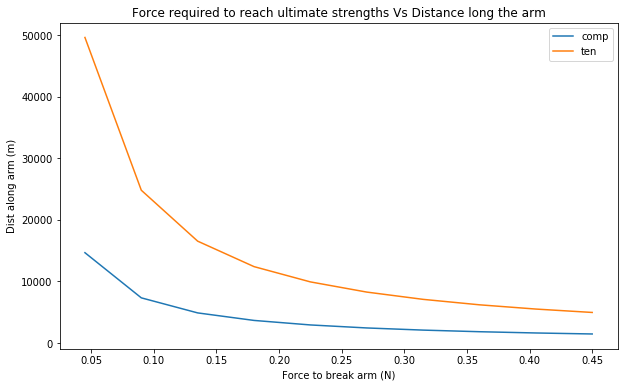

In [60]:
dforces = pd.DataFrame({"comp":(CF_compressive_strength*Ixx)/(y_bar*X[1:]), "ten":(CF_ultimate_tensile_strength*Ixx)/(y_bar*X[1:]),"x":X[1:]})
fig, axes = plt.subplots(figsize=(10,6))
axes.set_xlabel('Force to break arm (N)')
axes.set_ylabel('Dist along arm (m)')
axes.set_title('Force required to reach ultimate strengths Vs Distance long the arm');
axes.plot(dforces['x'],dforces['comp'])
axes.plot(dforces['x'],dforces['ten'])
axes.legend()

In [32]:
# Checking the force values
dforces[['comp','ten']]

,comp,ten
0,14674.986228,49648.399897
1,7337.493114,24824.199948
2,4891.662076,16549.466632
3,3668.746557,12412.099974
4,2934.997246,9929.679979
5,2445.831038,8274.733316
6,2096.426604,7092.628557
7,1834.373278,6206.049987
8,1630.554025,5516.488877
9,1467.498623,4964.839990


In [33]:
# Checking forces and relating distances.
print(X[1:])
(CF_compressive_strength*Ixx)/(y_bar*X[1:])

[0.045 0.09  0.135 0.18  0.225 0.27  0.315 0.36  0.405 0.45 ]


array([14674.98622793,  7337.49311396,  4891.66207598,  3668.74655698,
        2934.99724559,  2445.83103799,  2096.42660399,  1834.37327849,
        1630.55402533,  1467.49862279])

#### Checking the energy required to create the forces above.
$$\Delta v = \frac{F\Delta t}{m}$$

$$(mgh)_{in} =(\frac{1}{2} mv^2)_{out}$$

Rearrange the energy to find h

In [81]:
dt = 0.1
m = 5
vf = dforces['comp']*dt/m # impulse to find change in velocity
h = vf**2/(2*9.81) # final kinetic energy to find input potential energy
h # resulting heights to drop (metres)

0    4390.524379
1    1097.631095
2     487.836042
3     274.407774
4     175.620975
5     121.959011
6      89.602538
7      68.601943
8      54.204005
9      43.905244
Name: comp, dtype: float64

Heights very dependant on the dt and seem unrealistic. Result = Mauro stuck xD

## Testing the forces required to reach the total strain stored in the beam given varying distances along the arm.

In [36]:
#Force to create max strain en if leg at the end of arm.
P = np.sqrt((max_Cstrain_en*6*CF_young_modulus*Ixx)/(L**3-X[:10]**3))
P

array([3191.80701098, 3193.40411241, 3204.65135668, 3235.78907385,
       3299.12446222, 3412.18522279, 3604.77857371, 3937.80258344,
       4569.05844484, 6131.29170649])

In [37]:
# height calc
m = 5
h = (P**2*(L**3-X[:10]**3))/(6*CF_young_modulus*Ixx*m*g)
h

array([2.09518207, 2.09518207, 2.09518207, 2.09518207, 2.09518207,
       2.09518207, 2.09518207, 2.09518207, 2.09518207, 2.09518207])

In [38]:
# energy calc
(P**2*(L**3-X[:10]**3))/(6*CF_young_modulus*Ixx)

array([102.76868055, 102.76868055, 102.76868055, 102.76868055,
       102.76868055, 102.76868055, 102.76868055, 102.76868055,
       102.76868055, 102.76868055])